In [6]:
import torch
from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms
from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt



# Modelo pre-entrenado

In [19]:
inception = models.inception_v3(pretrained=True)


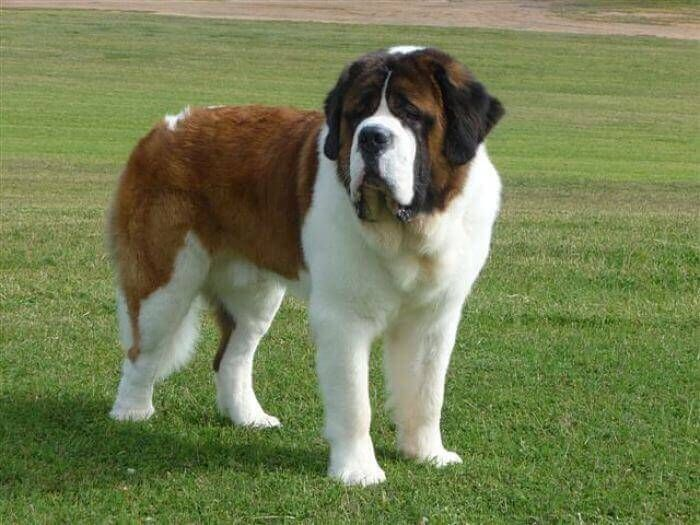

In [11]:
url = 'https://i.pinimg.com/originals/f3/65/df/f365df1ec06da3ca3fe6edc26dbf44e3.jpg'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

In [29]:
preprocess = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


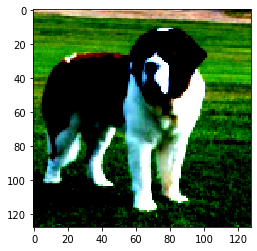

In [30]:
img_t= preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1,2,0))

In [20]:
inception.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [31]:
out = inception(batch)
out

tensor([[ 4.1654e+00,  4.0731e+00,  3.2256e+00, -3.4058e+00, -6.8179e+00,
          9.1164e-01, -2.5574e+00,  7.9614e-01, -4.1975e-01,  2.4221e+00,
          2.2884e-01, -2.4912e+00, -5.3079e+00,  1.5479e+00, -1.7799e+00,
         -1.7200e+00,  1.7982e+00, -7.8311e+00, -3.5371e+00, -1.3416e-02,
          5.2731e+00, -7.9388e+00, -2.3805e+00, -2.3865e+00, -3.4686e+00,
         -8.0140e-01, -3.6806e+00, -7.5662e+00, -5.2664e+00, -2.9798e+00,
          3.7347e+00, -1.8713e+00,  9.3544e-01,  4.4185e+00, -2.8788e+00,
          6.3977e+00,  1.2033e+00,  4.6557e+00,  1.6425e+00, -4.2698e+00,
          5.3209e-01, -3.9120e+00, -1.0716e+00, -1.3804e+00, -1.2370e+00,
         -1.3046e+00,  4.9977e+00, -8.4512e-01, -5.0872e+00,  3.0967e+00,
         -4.0449e+00,  2.2037e+00,  1.1824e+00, -5.4005e+00, -9.7760e+00,
         -1.6191e+00, -6.5279e+00, -4.1338e+00, -1.3107e+00, -6.6561e+00,
         -4.0617e+00, -1.6510e+00,  2.3633e-01, -1.8266e+00, -2.8857e+00,
         -8.8368e+00, -7.0617e+00,  5.

In [32]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt') #Se guarda el archivo donde están todas las etiquetas, esto es, el nombre de los objetos, ejemplo "golden retriever, Labrador retriever" etc.
with open('labels.txt') as f: #Se abre el archivo .txt y se crea un arreglo con estos nombres con la siguiente línea
    labels = [line.strip() for line in f.readlines()] #line.strip - elimina los espacios en los extremos; f.readlines - Lee linea por linea el archivo

In [33]:
_, index = torch.max(out, 1)


In [34]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('Saint Bernard, St Bernard', 100.0)

In [35]:
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
    print(labels[i], percentage[i].item())

Saint Bernard, St Bernard 100.0
Greater Swiss Mountain dog 3.230440342853226e-14
basset, basset hound 6.146352306685471e-17
boxer 2.1910475870590354e-17
English foxhound 6.139740238459029e-18


# Trabajando con un dataset

In [64]:
data_path = 'data/'
dataset = datasets.CIFAR10(data_path, train=True, download=True)
validation_set = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [65]:
classes = ['plane' ,'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [66]:
len(dataset)

50000

In [67]:
img, label = dataset[100]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F9969CCA0D0>, 8, 'ship')

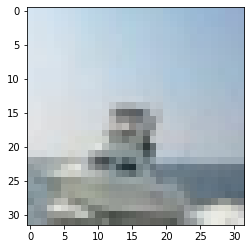

In [68]:
plt.imshow(img)

In [69]:
tensor_transform = transforms.ToTensor()
img_tensor = tensor_transform(img)
img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F9969CCA0D0>,
 tensor([[[0.8353, 0.8275, 0.8275,  ..., 0.5922, 0.5922, 0.5843],
          [0.8392, 0.8314, 0.8314,  ..., 0.5961, 0.5961, 0.5922],
          [0.8471, 0.8392, 0.8353,  ..., 0.6000, 0.6000, 0.5922],
          ...,
          [0.5686, 0.5333, 0.5608,  ..., 0.8471, 0.7686, 0.7176],
          [0.5451, 0.5059, 0.5059,  ..., 0.8902, 0.8745, 0.8196],
          [0.5373, 0.5608, 0.5333,  ..., 0.8196, 0.8510, 0.8941]],
 
         [[0.8980, 0.8902, 0.8902,  ..., 0.6824, 0.6824, 0.6745],
          [0.8980, 0.8902, 0.8902,  ..., 0.6863, 0.6863, 0.6824],
          [0.8980, 0.8902, 0.8902,  ..., 0.6902, 0.6902, 0.6824],
          ...,
          [0.6235, 0.5804, 0.5961,  ..., 0.8510, 0.7725, 0.7176],
          [0.6000, 0.5569, 0.5451,  ..., 0.8941, 0.8784, 0.8196],
          [0.5961, 0.6078, 0.5686,  ..., 0.8196, 0.8510, 0.8941]],
 
         [[0.9490, 0.9412, 0.9412,  ..., 0.8078, 0.8078, 0.8000],
          [0.9451, 0.9373, 0.9373,  ..., 0

In [70]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [71]:
img, label = dataset[100]
img

tensor([[[0.8353, 0.8275, 0.8275,  ..., 0.5922, 0.5922, 0.5843],
         [0.8392, 0.8314, 0.8314,  ..., 0.5961, 0.5961, 0.5922],
         [0.8471, 0.8392, 0.8353,  ..., 0.6000, 0.6000, 0.5922],
         ...,
         [0.5686, 0.5333, 0.5608,  ..., 0.8471, 0.7686, 0.7176],
         [0.5451, 0.5059, 0.5059,  ..., 0.8902, 0.8745, 0.8196],
         [0.5373, 0.5608, 0.5333,  ..., 0.8196, 0.8510, 0.8941]],

        [[0.8980, 0.8902, 0.8902,  ..., 0.6824, 0.6824, 0.6745],
         [0.8980, 0.8902, 0.8902,  ..., 0.6863, 0.6863, 0.6824],
         [0.8980, 0.8902, 0.8902,  ..., 0.6902, 0.6902, 0.6824],
         ...,
         [0.6235, 0.5804, 0.5961,  ..., 0.8510, 0.7725, 0.7176],
         [0.6000, 0.5569, 0.5451,  ..., 0.8941, 0.8784, 0.8196],
         [0.5961, 0.6078, 0.5686,  ..., 0.8196, 0.8510, 0.8941]],

        [[0.9490, 0.9412, 0.9412,  ..., 0.8078, 0.8078, 0.8000],
         [0.9451, 0.9373, 0.9373,  ..., 0.8118, 0.8118, 0.8039],
         [0.9373, 0.9294, 0.9294,  ..., 0.8078, 0.8078, 0.

In [72]:
img.min(), img.max()

(tensor(0.1176), tensor(0.9490))

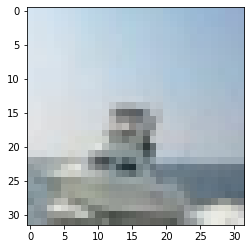

In [73]:
plt.imshow(img.permute(1, 2, 0))

In [75]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [76]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [77]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [78]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [84]:
transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
              ])


In [85]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'bird'

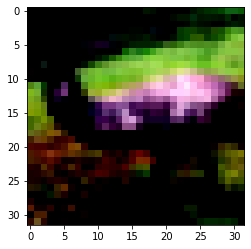

In [88]:
img_transformed,label = dataset[849]

plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]